In [100]:
import pandas as pd
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')

In [101]:
bitcoin = bitcoin.iloc[:,[2,5,7]]
bitcoin.columns = ['Date','Open', 'Close']
bitcoin['Date'] = bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]) 
bitcoin = bitcoin.set_index('Date')
bitcoin

,Open,Close
Date,,
2014-12-01,370.00,370.00
2014-12-02,378.00,378.00
2014-12-03,378.00,378.00
2014-12-04,377.10,377.10
2014-12-06,378.00,378.00
...,...,...
2023-03-12,22276.69,22219.08
2023-03-13,24710.00,24220.00
2023-03-14,26553.90,24762.65


<AxesSubplot: xlabel='Date'>

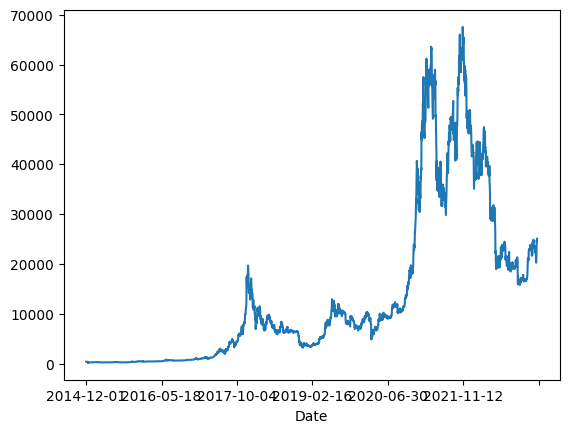

In [102]:
bitcoin['Close'].plot()

In [103]:
bitcoin.index =pd.to_datetime(bitcoin.index)
bitcoin['Year']=bitcoin.index.year
bitcoin['Mon']=bitcoin.index.month
bitcoin['Day']=bitcoin.index.day
dates=bitcoin[['Year','Mon','Day']]

bitcoin.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
bitcoin

Open     Close  Year  Mon  Day
Year Mon Day                                    
2014 12  1      370.00    370.00  2014   12    1
         2      378.00    378.00  2014   12    2
         3      378.00    378.00  2014   12    3
         4      377.10    377.10  2014   12    4
         6      378.00    378.00  2014   12    6
...                ...       ...   ...  ...  ...
2023 3   12   22276.69  22219.08  2023    3   12
         13   24710.00  24220.00  2023    3   13
         14   26553.90  24762.65  2023    3   14
         15   25300.00  24377.16  2023    3   15
         16   25043.97  25032.76  2023    3   16

[2990 rows x 5 columns]

In [104]:
bitcoin['Difference'] = bitcoin['Close']-bitcoin['Open']
bitcoin

Open     Close  Year  Mon  Day  Difference
Year Mon Day                                                
2014 12  1      370.00    370.00  2014   12    1        0.00
         2      378.00    378.00  2014   12    2        0.00
         3      378.00    378.00  2014   12    3        0.00
         4      377.10    377.10  2014   12    4        0.00
         6      378.00    378.00  2014   12    6        0.00
...                ...       ...   ...  ...  ...         ...
2023 3   12   22276.69  22219.08  2023    3   12      -57.61
         13   24710.00  24220.00  2023    3   13     -490.00
         14   26553.90  24762.65  2023    3   14    -1791.25
         15   25300.00  24377.16  2023    3   15     -922.84
         16   25043.97  25032.76  2023    3   16      -11.21

[2990 rows x 6 columns]

In [105]:
year_day_mean=bitcoin.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['Difference']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
tmpmn

Year  Mon
2014  12      -7.945556
2015  1      -22.064211
      2       -5.518929
      3       -5.854839
      4       -3.593667
                ...    
2022  11    -443.167333
      12    -196.263226
2023  1     -272.298710
      2     -445.063929
      3     -527.829375
Name: Difference, Length: 100, dtype: float64

In [106]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.989107,0.956693,0.965591,0.931494,0.937835,0.860271,0.935240,0.891288,0.823211,0.851081,0.614289
Feb,0.989107,1.000000,0.986345,0.983611,0.943597,0.955564,0.873284,0.949063,0.904783,0.832599,0.865822,0.625408
Mar,0.956693,0.986345,1.000000,0.982501,0.953573,0.949003,0.856482,0.954979,0.924096,0.855413,0.899179,0.675919
Apr,0.965591,0.983611,0.982501,1.000000,0.964337,0.986228,0.912985,0.971231,0.931985,0.864583,0.889017,0.652150
May,0.931494,0.943597,0.953573,0.964337,1.000000,0.959181,0.893915,0.984815,0.990903,0.963551,0.967035,0.787053
Jun,0.937835,0.955564,0.949003,0.986228,0.959181,1.000000,0.966437,0.983223,0.938934,0.882311,0.889508,0.657539
Jul,0.860271,0.873284,0.856482,0.912985,0.893915,0.966437,1.000000,0.950798,0.891881,0.852123,0.834324,0.608054
Aug,0.935240,0.949063,0.954979,0.971231,0.984815,0.983223,0.950798,1.000000,0.979736,0.944660,0.947564,0.742503
Sep,0.891288,0.904783,0.924096,0.931985,0.990903,0.938934,0.891881,0.979736,1.000000,0.985363,0.989063,0.846886
Oct,0.823211,0.832599,0.855413,0.864583,0.963551,0.882311,0.852123,0.944660,0.985363,1.000000,0.979569,0.861149


([<matplotlib.axis.YTick at 0x2540589d5a0>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

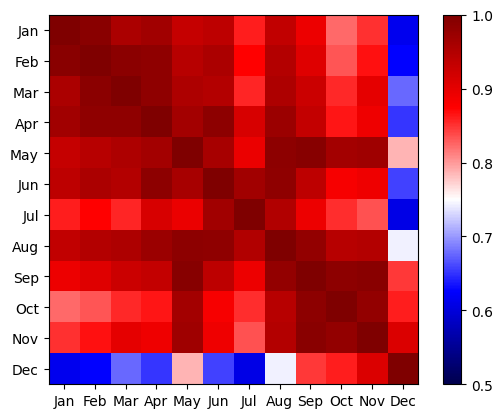

In [107]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=0.5,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

<AxesSubplot: xlabel='Feb', ylabel='Jan'>

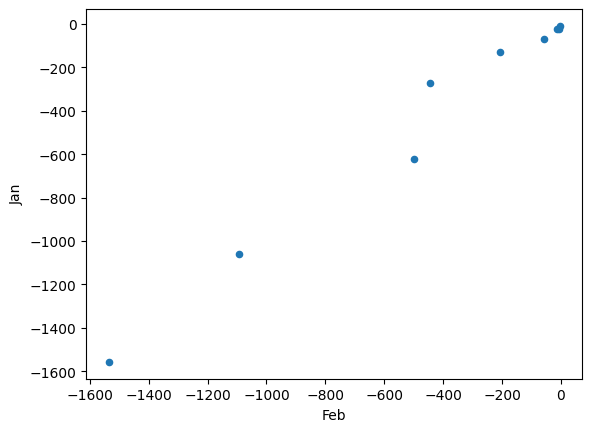

In [108]:
mon_mean.plot(kind='scatter',x='Feb',y='Jan')

<AxesSubplot: xlabel='Mar', ylabel='Dec'>

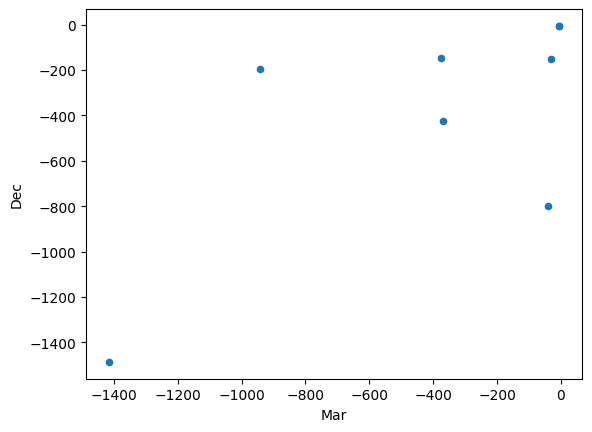

In [109]:
mon_mean.plot(kind='scatter',x='Mar',y='Dec')